# Welcome to Bitcoin Cryptocurrency Market
This notebook is created on June 3, 2025.

In [ ]:
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Reading the crypto_dataset Files
The crypto_dataset folder contains CSV files for various cryptocurrencies. We will use pandas to read these files and analyze the data.

In [14]:
# Example: Reading a CSV file
file_path = 'crypto_dataset/coin_Bitcoin.csv'
bitcoin_data = pd.read_csv(file_path)
print(bitcoin_data.head())

   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  


<font color = "Yellow">

<a id = "4"></a><br>
## Time Series Trend

In [15]:
#Convert the 'Date' column to datetime format and sort the dataset by date.
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data.sort_values(by='Date', inplace=True)

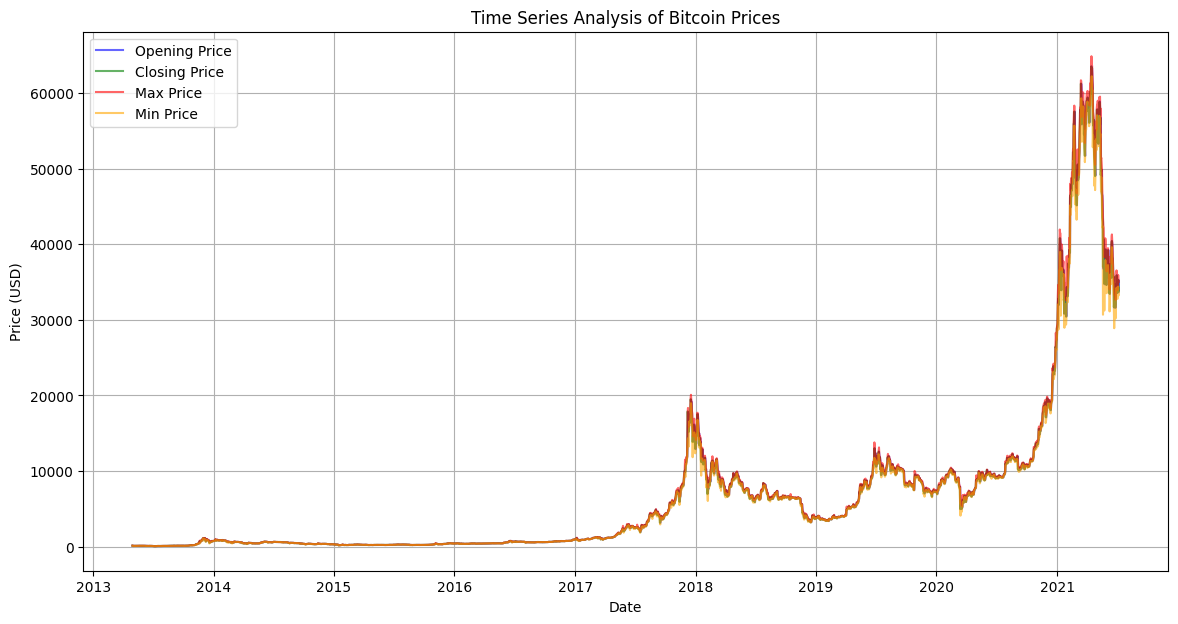

In [16]:
plt.figure(figsize=(14, 7))
# Opening Price Chart
plt.plot(bitcoin_data['Date'], bitcoin_data['Open'], label='Opening Price', color='blue', alpha=0.6)
# Closing Price Chart
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'], label='Closing Price', color='green', alpha=0.6)
# Max Price Chart
plt.plot(bitcoin_data['Date'], bitcoin_data['High'], label='Max Price', color='red', alpha=0.6)
# Min Price Chart
plt.plot(bitcoin_data['Date'], bitcoin_data['Low'], label='Min Price', color='orange', alpha=0.6)
plt.title('Time Series Analysis of Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()



<font color = "Yellow">

<a id = "5"></a><br>
## Price Change Rates

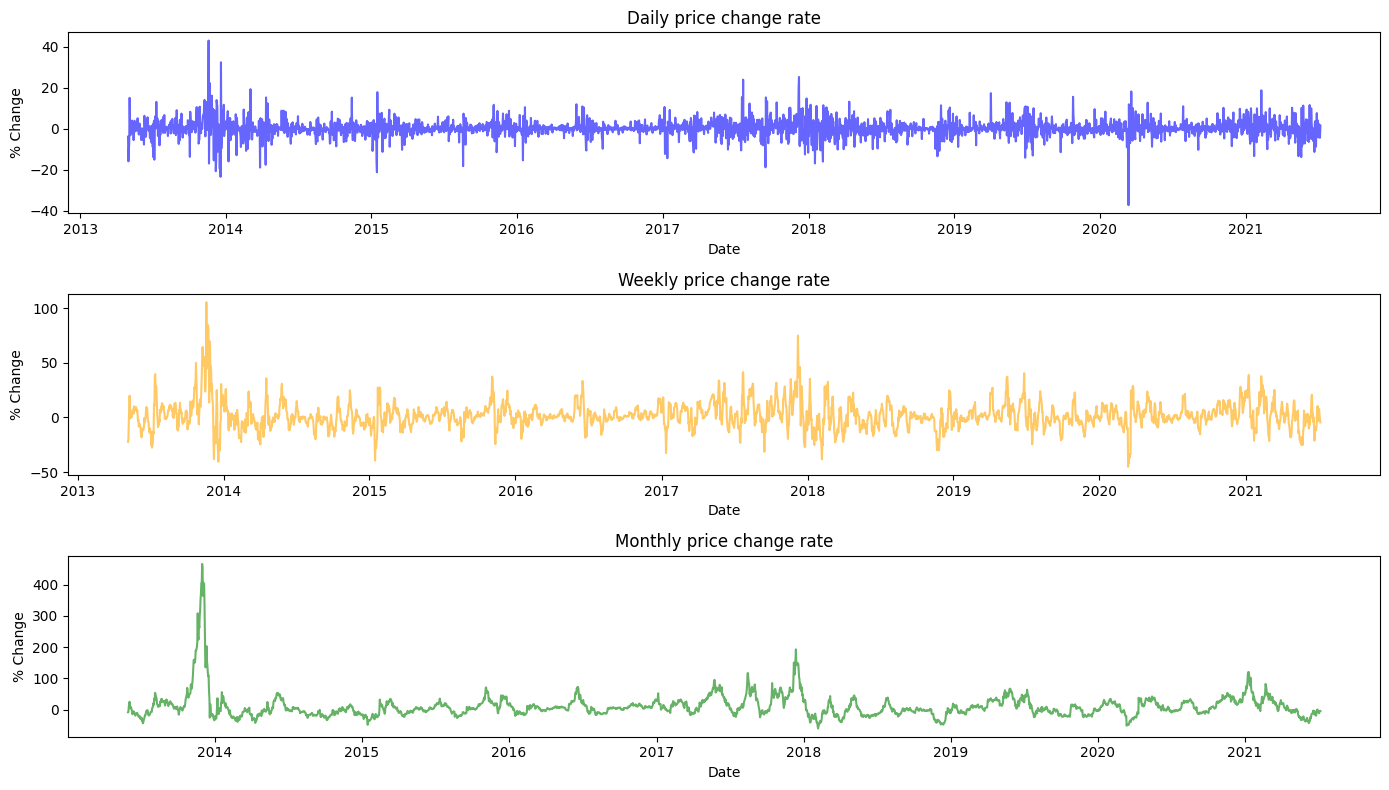

In [17]:
# Daily price change rate
bitcoin_data['Daily Change %'] = bitcoin_data['Close'].pct_change() * 100

# Weekly price change rate (7 days backward)
bitcoin_data['Weekly Change %'] = bitcoin_data['Close'].pct_change(periods=7) * 100

# Monthly price change rate (30 days backward)
bitcoin_data['Monthly Change %'] = bitcoin_data['Close'].pct_change(periods=30) * 100

# Visualizing the results
plt.figure(figsize=(14, 8))
# Daily change
plt.subplot(3, 1, 1)
plt.plot(bitcoin_data['Date'], bitcoin_data['Daily Change %'], color='blue', alpha=0.6)
plt.title('Daily price change rate')
plt.xlabel('Date')
plt.ylabel('% Change')

# Weekly change
plt.subplot(3, 1, 2)
plt.plot(bitcoin_data['Date'], bitcoin_data['Weekly Change %'], color='orange', alpha=0.6)
plt.title('Weekly price change rate')
plt.xlabel('Date')
plt.ylabel('% Change')

# Monthly change
plt.subplot(3, 1, 3)
plt.plot(bitcoin_data['Date'], bitcoin_data['Monthly Change %'], color='green', alpha=0.6)
plt.title('Monthly price change rate')
plt.xlabel('Date')
plt.ylabel('% Change')

plt.tight_layout()
plt.show()

<font color = "Yellow">

<a id = "6"></a><br>
## Volatility Analysis

* Daily price change
* Short-term(7-Day)
* Middle-term(30-day)
* Long-term(90-day)
* Rolling Volatilite

<font color = "Yellow">

<a id = "7"></a><br>
### Daily price change

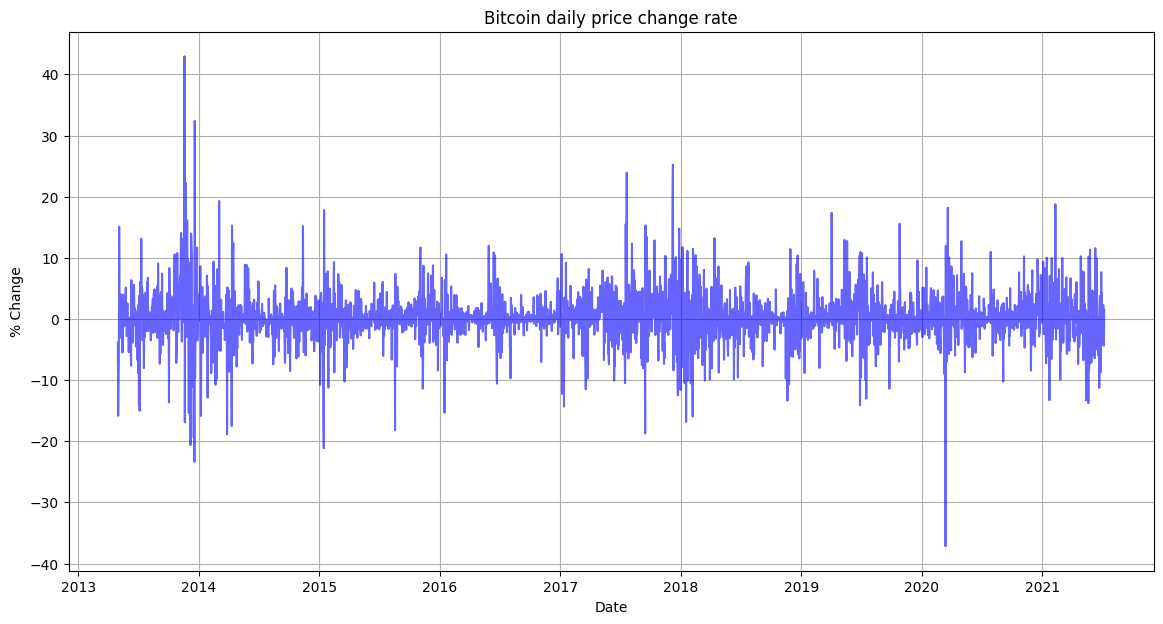

In [18]:
# Convert the 'Date' column to datetime format and sort the dataset by date.
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data.sort_values(by='Date', inplace=True)

# Calculate the daily price change rate
bitcoin_data['Daily Change %'] = bitcoin_data['Close'].pct_change() * 100

# Visualize the daily price change rate
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['Date'], bitcoin_data['Daily Change %'], color='blue', alpha=0.6)
plt.title('Bitcoin daily price change rate')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.grid(True)
plt.show()

<font color = "Yellow">

<a id = "8"></a><br>
### Short-Term (7-Day)

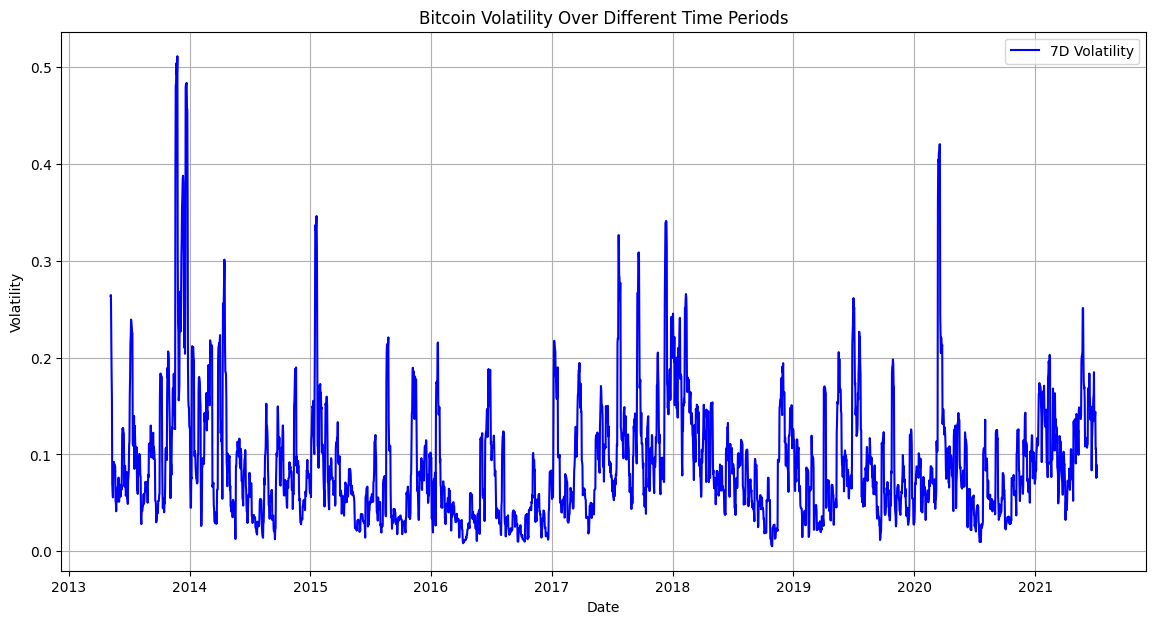

In [19]:
bitcoin_data['7D Volatility'] = bitcoin_data['Close'].pct_change().rolling(window=7).std() * np.sqrt(7)
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['Date'], bitcoin_data['7D Volatility'], label='7D Volatility', color='blue')
plt.title('Bitcoin Volatility Over Different Time Periods')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

<font color = "Yellow">

<a id = "9"></a><br>
### Middle-Term(30-Day)

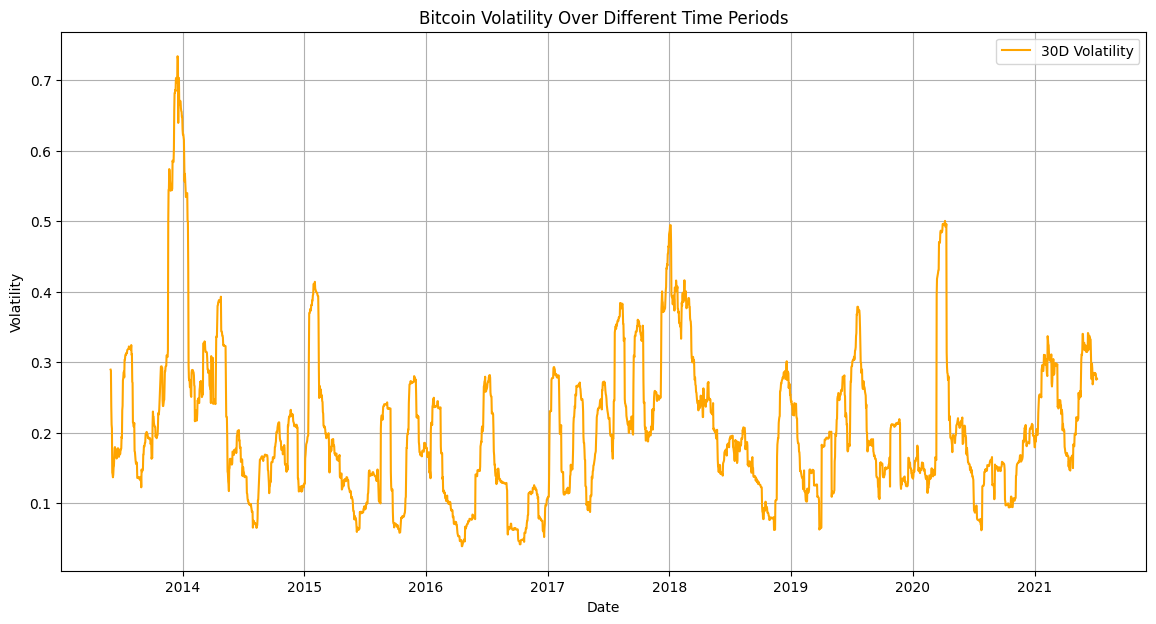

In [20]:
bitcoin_data['30D Volatility'] = bitcoin_data['Close'].pct_change().rolling(window=30).std() * np.sqrt(30)
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['Date'], bitcoin_data['30D Volatility'], label='30D Volatility', color='orange')
plt.title('Bitcoin Volatility Over Different Time Periods')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

<font color = "Yellow">

<a id = "10"></a><br>
### Long-Term(90-Day)

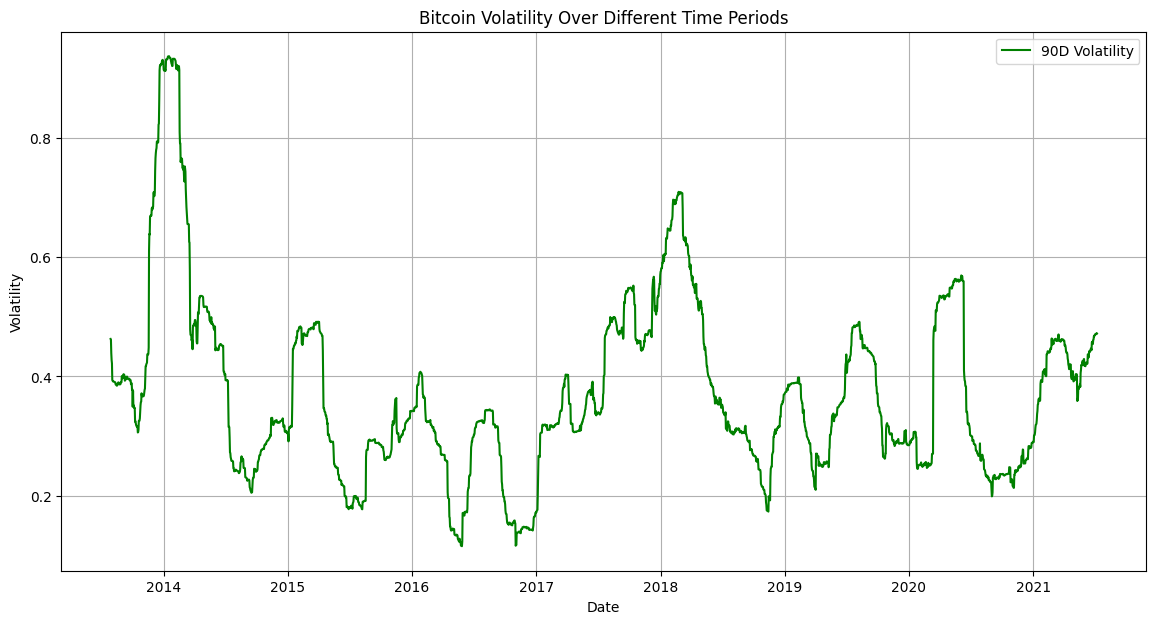

In [21]:
bitcoin_data['90D Volatility'] = bitcoin_data['Close'].pct_change().rolling(window=90).std() * np.sqrt(90)
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['Date'], bitcoin_data['90D Volatility'], label='90D Volatility', color='green')
plt.title('Bitcoin Volatility Over Different Time Periods')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Historical Prices and Market Capitalizations
This section analyzes how the historical prices and market capitalizations of various cryptocurrencies have changed over time.

In [36]:
# Load historical data for all cryptocurrencies
crypto_data = {}
for file_name in os.listdir('crypto_dataset'):
    coin_name = file_name.split('_')[1].split('.')[0]
    file_path = os.path.join('crypto_dataset', file_name)
    crypto_data[coin_name] = pd.read_csv(file_path)
    crypto_data[coin_name]['Date'] = pd.to_datetime(crypto_data[coin_name]['Date'])
    crypto_data[coin_name].sort_values(by='Date', inplace=True)

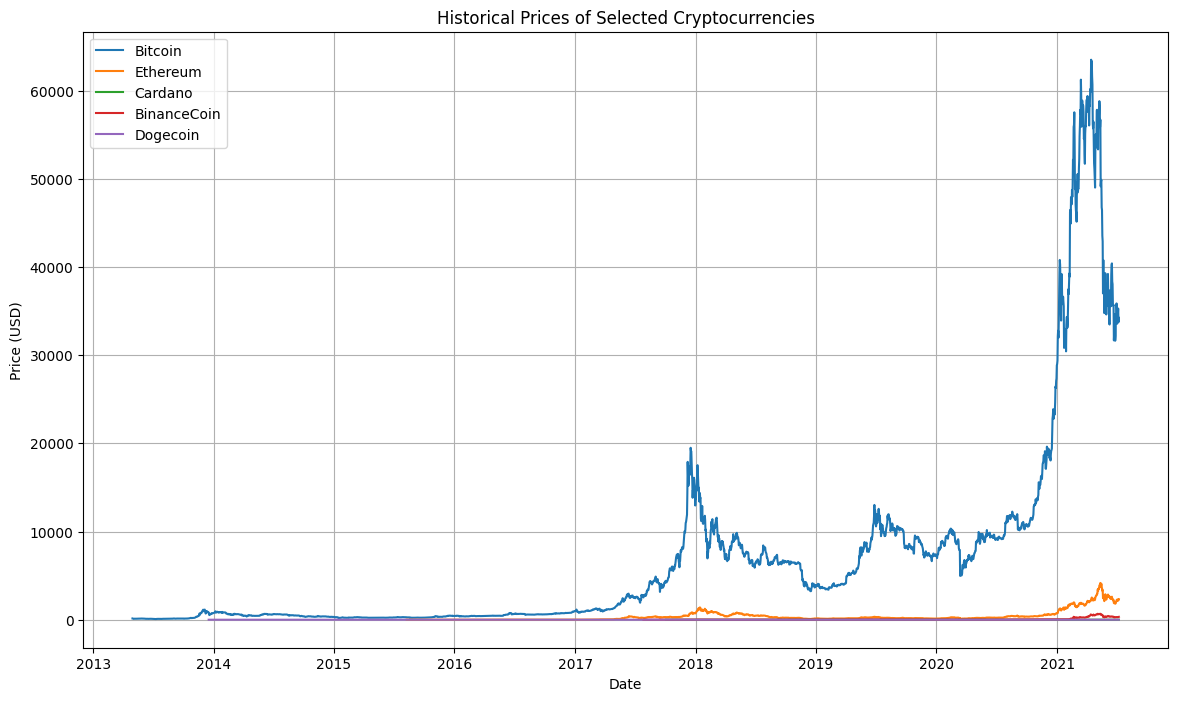

In [37]:
# Visualize historical prices of selected cryptocurrencies
selected_coins = ['Bitcoin', 'Ethereum', 'Cardano', 'BinanceCoin', 'Dogecoin']
plt.figure(figsize=(14, 8))
for coin in selected_coins:
    plt.plot(crypto_data[coin]['Date'], crypto_data[coin]['Close'], label=coin)
plt.title('Historical Prices of Selected Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

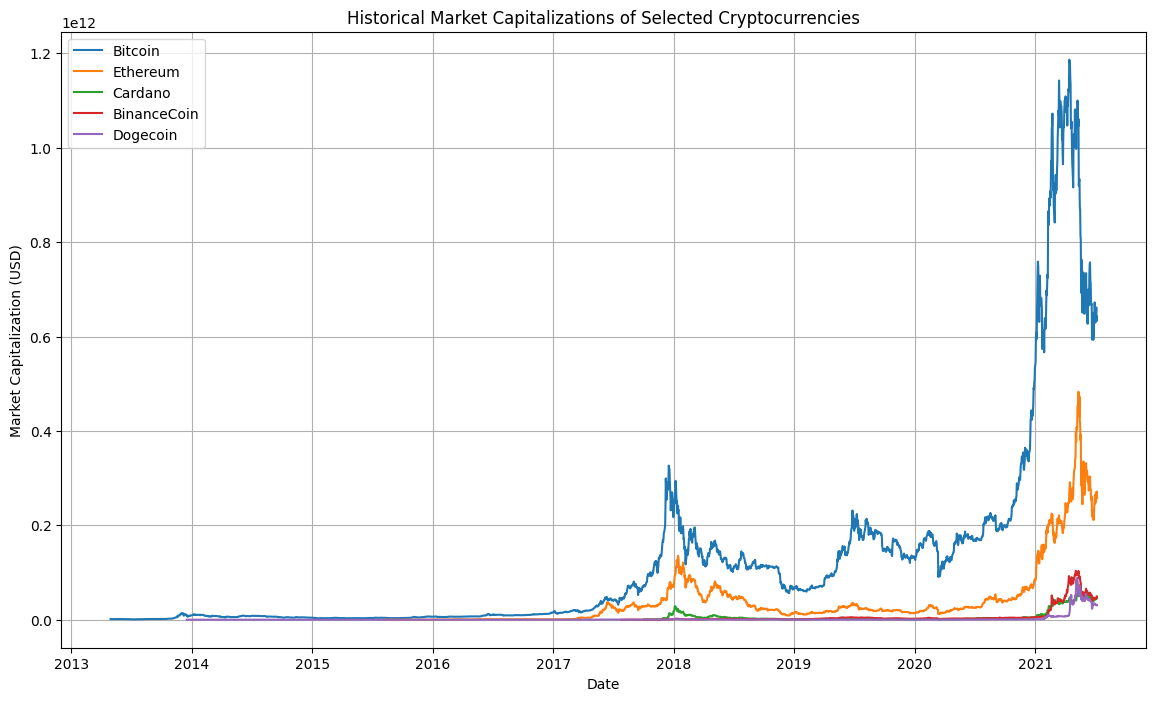

In [38]:
# Visualize historical market capitalizations of selected cryptocurrencies
plt.figure(figsize=(14, 8))
for coin in selected_coins:
    plt.plot(crypto_data[coin]['Date'], crypto_data[coin]['Marketcap'], label=coin)
plt.title('Historical Market Capitalizations of Selected Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Market Capitalization (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Bitcoin vs Other Cryptocurrencies
This section analyzes how Bitcoin compares to other cryptocurrencies in terms of market capitalization.

In [39]:
# Calculate Bitcoin's market cap percentage
bitcoin_market_cap = crypto_data['Bitcoin']['Marketcap'].iloc[-1]
total_market_cap = sum([crypto_data[coin]['Marketcap'].iloc[-1] for coin in crypto_data])
bitcoin_percentage = (bitcoin_market_cap / total_market_cap) * 100
print(f'Bitcoin Market Cap: {bitcoin_market_cap}')
print(f'Total Market Cap: {total_market_cap}')
print(f'Bitcoin Percentage: {bitcoin_percentage:.2f}%')

Bitcoin Market Cap: 641899161593.76
Total Market Cap: 1251489177631.8599
Bitcoin Percentage: 51.29%


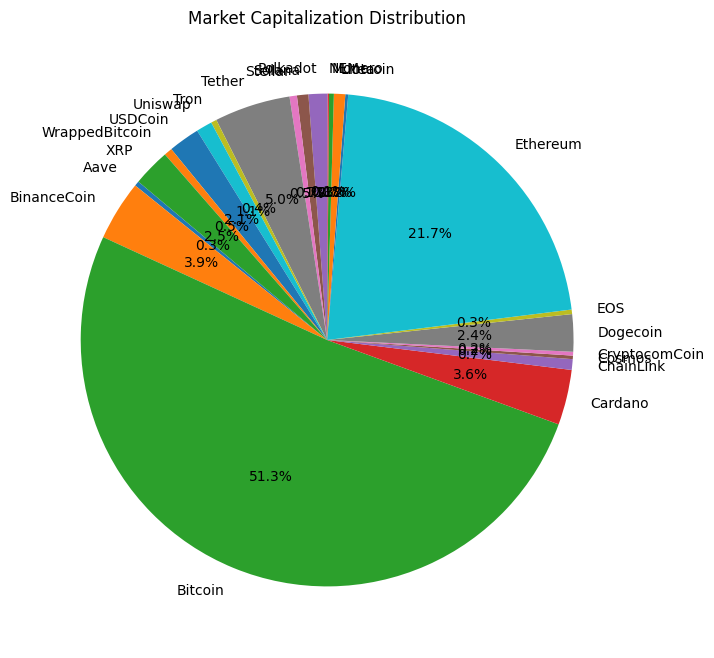

In [40]:
# Visualize Bitcoin's market cap compared to other cryptocurrencies
market_caps = {coin: crypto_data[coin]['Marketcap'].iloc[-1] for coin in crypto_data}
labels = list(market_caps.keys())
sizes = list(market_caps.values())
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Market Capitalization Distribution')
plt.show()

# Predicting Future Prices of Cryptocurrencies
This section uses machine learning to predict the future prices of selected cryptocurrencies based on historical data.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# Prepare data for prediction
selected_coin = 'Bitcoin'
data = crypto_data[selected_coin]
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)
data['Days'] = (data['Date'] - data['Date'].min()).dt.days
X = data[['Days']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 141494.04559953712


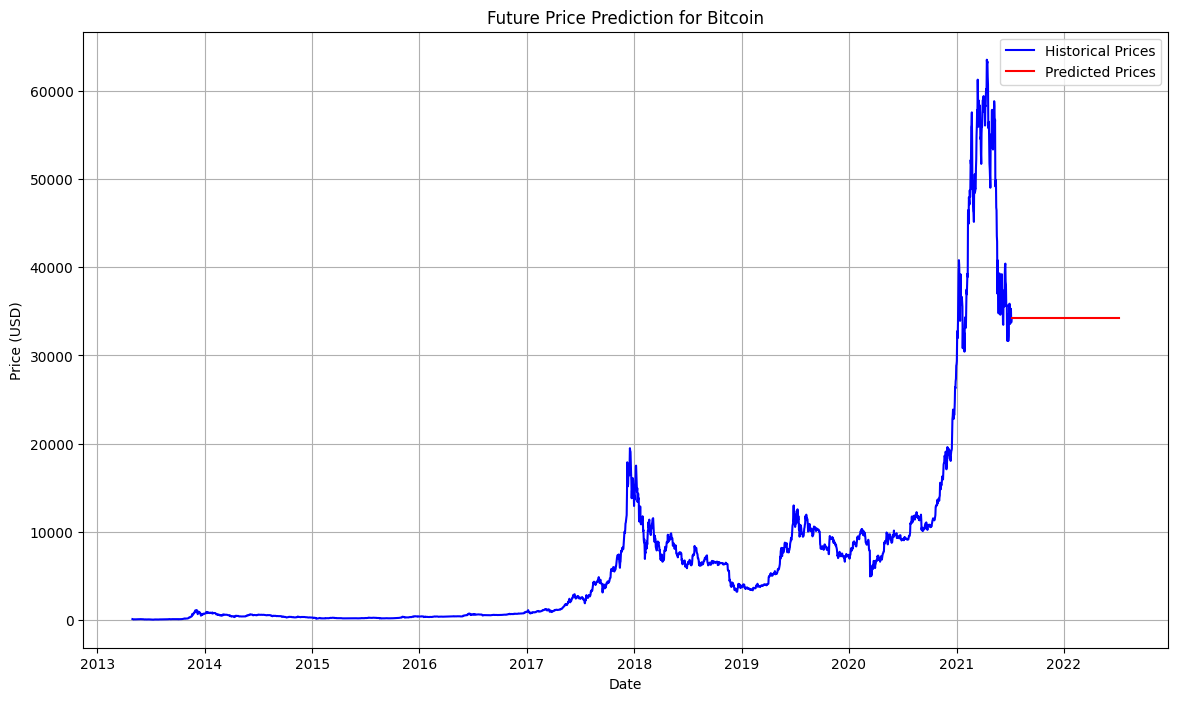

In [52]:
# Predict future prices
future_days = pd.DataFrame({'Days': range(data['Days'].max() + 1, data['Days'].max() + 366)})
future_prices = model.predict(future_days)
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['Close'], label='Historical Prices', color='blue')
future_dates = pd.date_range(start=data['Date'].max() + pd.Timedelta(days=1), periods=365)
plt.plot(future_dates, future_prices, label='Predicted Prices', color='red')
plt.title(f'Future Price Prediction for {selected_coin}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Volatility Analysis of Cryptocurrencies
This section analyzes which cryptocurrencies are more volatile and which ones are more stable based on historical data.

In [57]:
# Calculate volatility for each cryptocurrency
volatility_data = {}
for coin in crypto_data:
    crypto_data[coin]['Daily Change %'] = crypto_data[coin]['Close'].pct_change() * 100
    volatility = crypto_data[coin]['Daily Change %'].std()
    volatility_data[coin] = volatility
# Sort cryptocurrencies by volatility
sorted_volatility = sorted(volatility_data.items(), key=lambda x: x[1], reverse=True)
print('Cryptocurrencies sorted by volatility:')
for coin, vol in sorted_volatility:
    print(f'{coin}: {vol:.2f}%')

Cryptocurrencies sorted by volatility:
Dogecoin: 11.35%
Tron: 9.53%
Solana: 9.45%
Uniswap: 9.13%
Polkadot: 8.72%
NEM: 8.69%
Aave: 8.65%
Cardano: 8.36%
XRP: 8.16%
Stellar: 8.15%
CryptocomCoin: 8.15%
ChainLink: 8.04%
BinanceCoin: 8.00%
EOS: 7.55%
Iota: 7.36%
Cosmos: 7.20%
Monero: 6.98%
Litecoin: 6.85%
Ethereum: 6.30%
WrappedBitcoin: 4.29%
Bitcoin: 4.26%
Tether: 1.77%
USDCoin: 0.46%


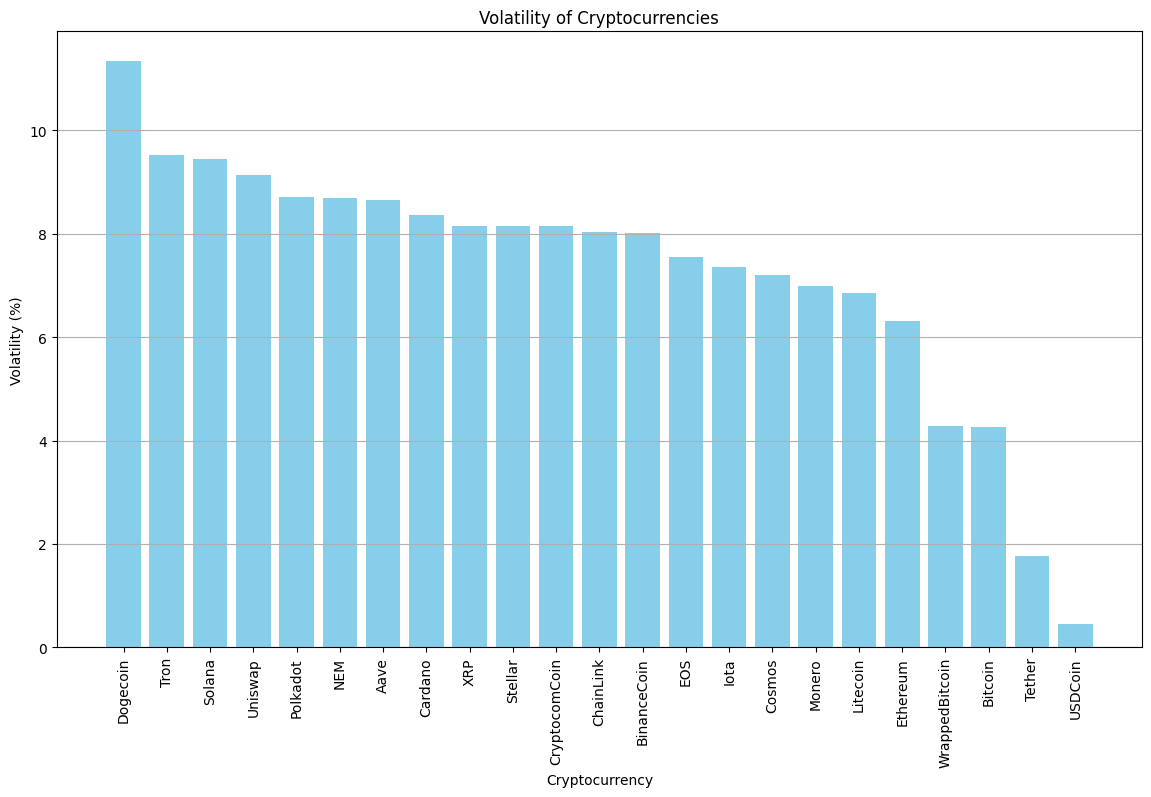

In [54]:
# Visualize volatility of cryptocurrencies
coins = [item[0] for item in sorted_volatility]
volatilities = [item[1] for item in sorted_volatility]
plt.figure(figsize=(14, 8))
plt.bar(coins, volatilities, color='skyblue')
plt.title('Volatility of Cryptocurrencies')
plt.xlabel('Cryptocurrency')
plt.ylabel('Volatility (%)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Correlation Analysis of Cryptocurrency Price Fluctuations
This section analyzes how the price fluctuations of various cryptocurrencies correlate with each other.

In [55]:
# Prepare data for correlation analysis
price_data = pd.DataFrame()
for coin in crypto_data:
    price_data[coin] = crypto_data[coin]['Close']
# Calculate daily percentage change
price_data_pct_change = price_data.pct_change()
# Compute correlation matrix
correlation_matrix = price_data_pct_change.corr()
print('Correlation Matrix:')
print(correlation_matrix)

Correlation Matrix:
                    Aave  BinanceCoin   Bitcoin   Cardano  ChainLink  \
Aave            1.000000    -0.046351  0.017104 -0.064355   0.076761   
BinanceCoin    -0.046351     1.000000  0.019982 -0.009056   0.055682   
Bitcoin         0.017104     0.019982  1.000000  0.058261   0.060819   
Cardano        -0.064355    -0.009056  0.058261  1.000000   0.084432   
ChainLink       0.076761     0.055682  0.060819  0.084432   1.000000   
Cosmos         -0.046973     0.021072  0.041954  0.074447   0.057160   
CryptocomCoin   0.106125    -0.037184  0.059330  0.056202   0.043412   
Dogecoin        0.074524    -0.035800 -0.109450  0.037505   0.130572   
EOS            -0.000762     0.115456 -0.090839 -0.063636  -0.062878   
Ethereum       -0.033439    -0.007249  0.030609  0.041836   0.047365   
Iota            0.093158    -0.042499  0.117420  0.023967   0.124274   
Litecoin        0.065914     0.043335  0.707450  0.047972   0.022129   
Monero         -0.028380     0.054930  0.009

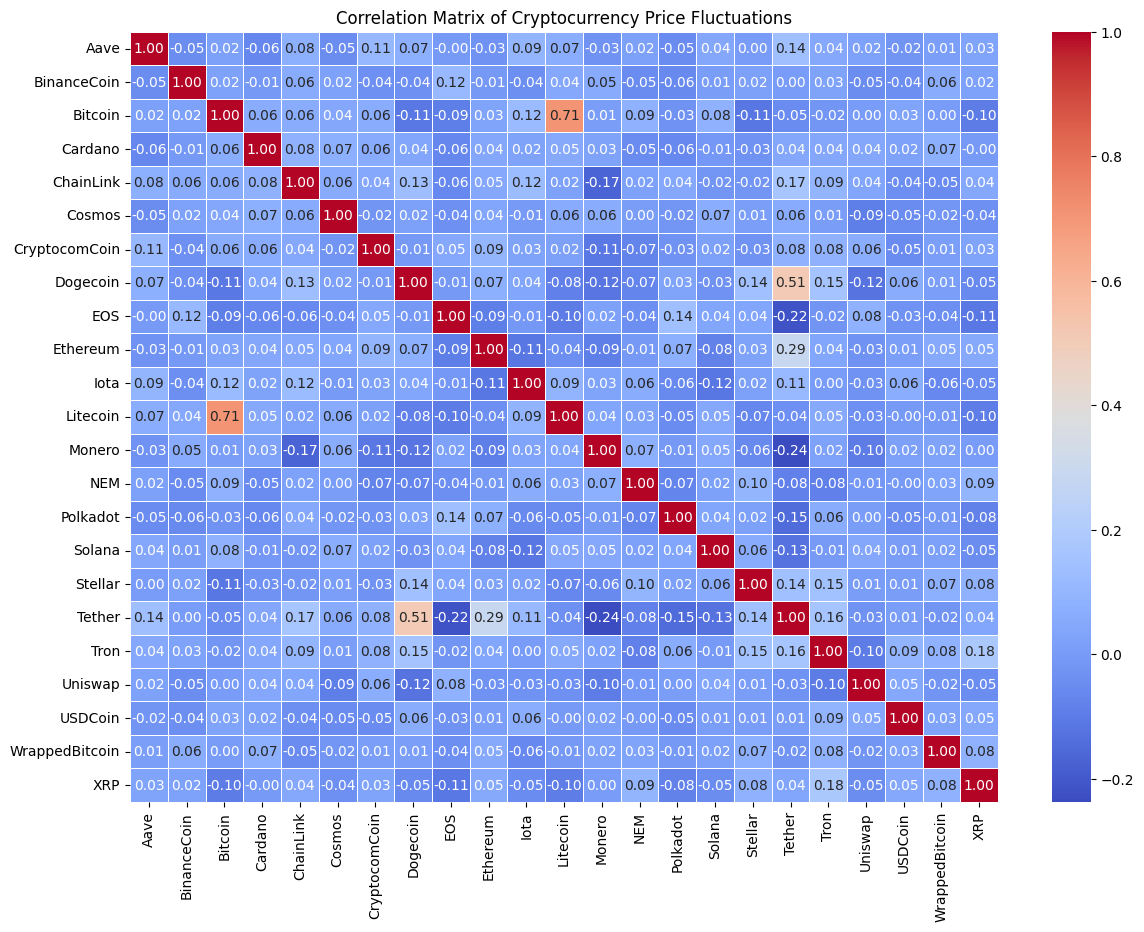

In [56]:
# Visualize the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Cryptocurrency Price Fluctuations')
plt.show()

# Seasonal Trend in Cryptocurrency Price Fluctuations
This section analyzes the seasonal trends in the price fluctuations of cryptocurrencies.

In [58]:
# Extract month and year from the date
selected_coin = 'Bitcoin'
data = crypto_data[selected_coin]
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
# Group by month and calculate average closing price
monthly_trend = data.groupby('Month')['Close'].mean()
print('Monthly Average Closing Prices:')
print(monthly_trend)

Monthly Average Closing Prices:
Month
1     7794.593122
2     8900.845758
3     9661.598065
4     9916.183723
5     8296.456608
6     7309.402572
7     4662.263763
8     4294.634311
9     4070.568543
10    4196.870589
11    5028.558236
12    6334.185375
Name: Close, dtype: float64


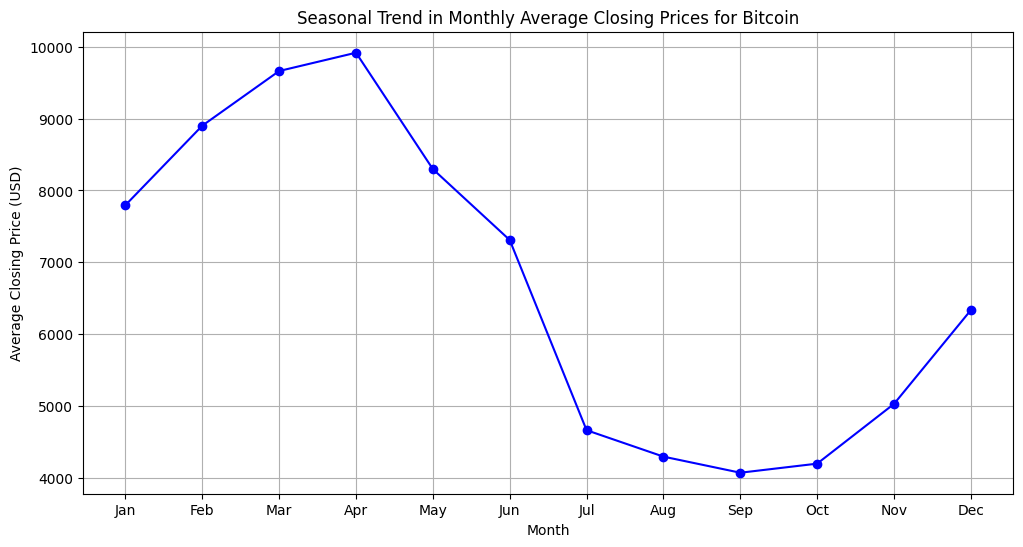

In [59]:
# Visualize seasonal trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', color='blue')
plt.title(f'Seasonal Trend in Monthly Average Closing Prices for {selected_coin}')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (USD)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()